In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [ ]:
# #learning sensitivity
# all_sce=[
#      "stick_20240822_80p", "crt2030_80p_nl_0821","crt2040_80p_nl_0821",
# #     "stick_20240822_60p", "crt2030_60p_nl_0821","crt2040_60p_nl_0821","crt2030_60p_l_0821","crt2040_60p_l_0821",
# #   "stick_20240822_100p", "crt2030_100p_nl_0821","crt2040_100p_nl_0821","crt2030_100p_l_0821","crt2040_100p_l_0821",
#   "crt2030_80p_l_0821","crt2030_80p_l_0821_midLearning", "crt2030_80p_l_0821_et","crt2030_80p_l_0821_nt",
#     "crt2040_80p_l_0821","crt2040_80p_l_0821_midLearning", "crt2040_80p_l_0821_et","crt2040_80p_l_0821_nt",
#  "stick_20240822_80p_lowCDR_lowBio", "crt2030_80p_nl_0821_lowCDR_lowBio","crt2040_80p_nl_0821_lowCDR_lowBio","crt2030_80p_l_0821_lowCDR_lowBio","crt2040_80p_l_0821_lowCDR_lowBio"
  
# ]

In [17]:
# macro sensitivity
all_sce=[
     "stick_20240822_80p", "crt2030_80p_nl_0821","crt2040_80p_nl_0821",
  "crt2030_80p_l_0821",
    "crt2040_80p_l_0821",
    
    "stick_0821_80p_lowGDPlowPop", "crt2030_80p_nl_0821_lowGDPlowPop","crt2040_80p_nl_0821_lowGDPlowPop","crt2030_80p_l_0821_lowGDPlowPop","crt2040_80p_l_0821_lowGDPlowPop",
  
    "stick_0821_80p_highGDPhighPop",  "crt2030_80p_nl_0821_highGDPhighPop","crt2040_80p_nl_0821_highGDPhighPop","crt2030_80p_l_0821_highGDPhighPop","crt2040_80p_l_0821_highGDPhighPop",
  
    
    "crt2030_80p_nl_0821_likeBEV","crt2040_80p_nl_0821_likeBEV","crt2030_80p_l_0821_likeBEV","crt2040_80p_l_0821_likeBEV"
    ,"allin"
  
]

In [41]:
# this is backup, all scenarios

all_sce=[
     "stick_20240822_80p", "crt2030_80p_nl_0821","crt2040_80p_nl_0821","crt2030_80p_l_0821","crt2040_80p_l_0821",
    "stick_20240822_60p", "crt2030_60p_nl_0821","crt2040_60p_nl_0821","crt2030_60p_l_0821","crt2040_60p_l_0821",
  "stick_20240822_100p", "crt2030_100p_nl_0821","crt2040_100p_nl_0821","crt2030_100p_l_0821","crt2040_100p_l_0821",
  "crt2030_80p_l_0821_midLearning","crt2040_80p_l_0821_midLearning",
  "crt2030_80p_l_0821_et","crt2040_80p_l_0821_et",
  "crt2030_80p_l_0821_nt","crt2040_80p_l_0821_nt",
  "stick_0821_80p_lowGDPlowPop", "crt2030_80p_nl_0821_lowGDPlowPop","crt2040_80p_nl_0821_lowGDPlowPop","crt2030_80p_l_0821_lowGDPlowPop","crt2040_80p_l_0821_lowGDPlowPop",
  "stick_0821_80p_highGDPhighPop", 
  "crt2030_80p_nl_0821_highGDPhighPop","crt2040_80p_nl_0821_highGDPhighPop","crt2030_80p_l_0821_highGDPhighPop","crt2040_80p_l_0821_highGDPhighPop",
  "crt2030_80p_nl_0821_likeBEV","crt2040_80p_nl_0821_likeBEV","crt2030_80p_l_0821_likeBEV","crt2040_80p_l_0821_likeBEV",
  "stick_20240822_80p_lowCDR_lowBio", "crt2030_80p_nl_0821_lowCDR_lowBio","crt2040_80p_nl_0821_lowCDR_lowBio","crt2030_80p_l_0821_lowCDR_lowBio","crt2040_80p_l_0821_lowCDR_lowBio"
  ,#"allin",
      "crt2030_80p_nl_0821_likeBEV2","crt2040_80p_nl_0821_likeBEV2","crt2030_80p_l_0821_likeBEV2","crt2040_80p_l_0821_likeBEV2",
  "crt2030_80p_nl_0821_hateBEV2","crt2040_80p_nl_0821_hateBEV2","crt2030_80p_l_0821_hateBEV2","crt2040_80p_l_0821_hateBEV2"

]


In [ ]:
# now we select what we want - easy one: CO2 prices
Price_CO2_df = pd.DataFrame()
Price_CO2_df['scenario']=all_sce
price_list = []
    
for sce in all_sce:
    file_name = "CO2_prices_1007_" + sce + ".csv"  
    df_price = pd.read_csv(file_name) 

    filtered_df = df_price[(df_price['market'] == 'USACO2') & (df_price['year'] == 2050) & (df_price['scenario'] == sce)]

    if not filtered_df.empty:
        price_2050 = filtered_df['value'].values[0]  
    else:
        price_2050 = None 
        print("DANGER!")
    price_list.append(price_2050)

Price_CO2_df["Price2050_ori"] = price_list
Price_CO2_df['Price_plot'] = Price_CO2_df['Price2050_ori']*12/44*1.98

print(Price_CO2_df)

                              scenario  Price2050_ori  Price_plot
0                   stick_20240822_80p        302.679   163.44666
1                  crt2030_80p_nl_0821        334.468   180.61272
2                  crt2040_80p_nl_0821        427.284   230.73336
3                   crt2030_80p_l_0821        186.452   100.68408
4                   crt2040_80p_l_0821        291.585   157.45590
5                   stick_20240822_60p        236.416   127.66464
6                  crt2030_60p_nl_0821        227.061   122.61294
7                  crt2040_60p_nl_0821        299.438   161.69652
8                   crt2030_60p_l_0821        125.543    67.79322
9                   crt2040_60p_l_0821        170.855    92.26170
10                 stick_20240822_100p        352.823   190.52442
11                crt2030_100p_nl_0821        396.729   214.23366
12                crt2040_100p_nl_0821        583.550   315.11700
13                 crt2030_100p_l_0821        230.102   124.25508
14        

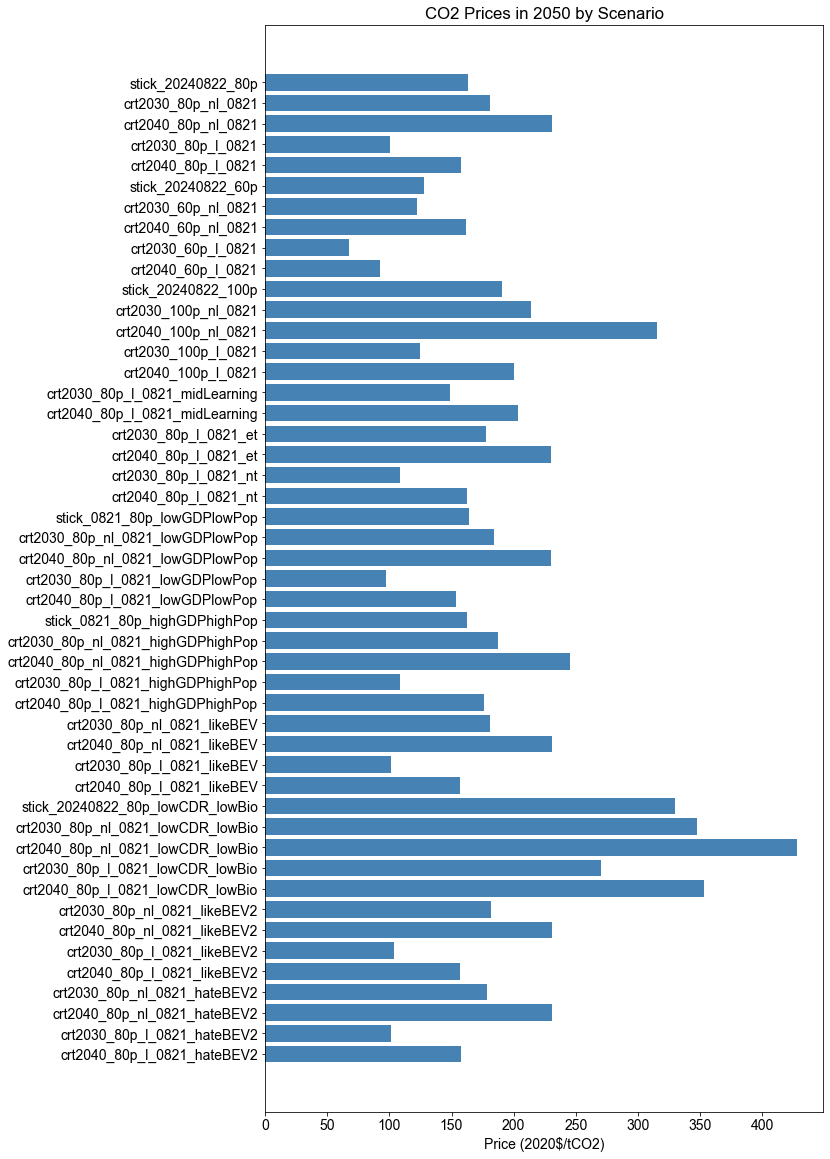

In [ ]:
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 14

plt.figure(figsize=(10, 20))  
Price_CO2_df = Price_CO2_df[::-1] 

plt.barh(Price_CO2_df['scenario'], Price_CO2_df['Price_plot'], color='steelblue')  

plt.title('CO2 Prices in 2050 by Scenario')
plt.xlabel('Price (2020$/tCO2)')
# plt.ylabel('Scenario')

plt.show()

In [ ]:

price_data = pd.DataFrame(columns=['scenario', 2025, 2030, 2035, 2040, 2045, 2050])

for sce in all_sce:
    file_name = "CO2_prices_1007_" + sce + ".csv"  
    df_price = pd.read_csv(file_name)

    df_scenario = df_price[df_price['market'] == 'USACO2']

    sce_prices = {'scenario': sce}
    
    for year in [2025, 2030, 2035, 2040, 2045, 2050]: 
        filtered_df = df_scenario[(df_scenario['year'] == year) & (df_scenario['scenario'] == sce)]
        
        if not filtered_df.empty:
            price = filtered_df['value'].values[0]
            sce_prices[year] = price
        else:
            sce_prices[year] = 0  

    price_data = price_data.append(sce_prices, ignore_index=True)


# print(price_data)
years = [2025, 2030, 2035, 2040, 2045, 2050] 
for year in years:
    Price_CO2_df[year] = price_data[year] * 12 / 44 * 1.98

Price_CO2_df.to_csv("CO2_price_all_2020USD.csv")

C:\Users\Huilin\AppData\Local\Temp\ipykernel_33536\2358033898.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


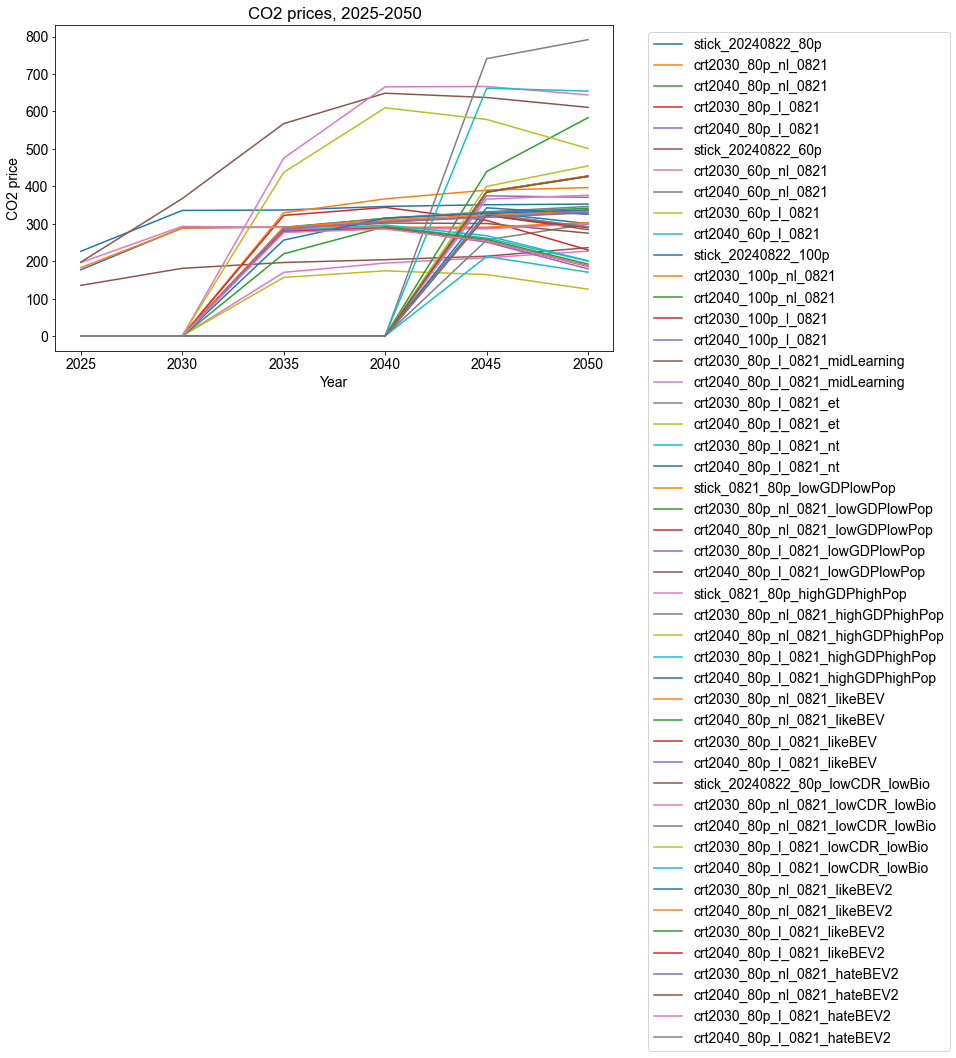

,scenario,Price2050_ori,Price_plot,2025,2030,2035,2040,2045,2050
47,crt2040_80p_l_0821_hateBEV2,292.176,157.77504,0.00000,0.00000,0.00000,0.00000,176.04270,157.77504
46,crt2030_80p_l_0821_hateBEV2,187.134,101.05236,0.00000,0.00000,149.63724,154.58256,137.05470,101.05236
45,crt2040_80p_nl_0821_hateBEV2,427.036,230.59944,0.00000,0.00000,0.00000,0.00000,207.66618,230.59944
44,crt2030_80p_nl_0821_hateBEV2,331.285,178.89390,0.00000,0.00000,155.22084,165.00672,171.73134,178.89390
43,crt2040_80p_l_0821_likeBEV2,289.877,156.53358,0.00000,0.00000,0.00000,0.00000,173.95236,156.53358
42,crt2030_80p_l_0821_likeBEV2,192.548,103.97592,0.00000,0.00000,118.80000,158.04504,139.71636,103.97592
41,crt2040_80p_nl_0821_likeBEV2,428.174,231.21396,0.00000,0.00000,0.00000,0.00000,208.08522,231.21396
40,crt2030_80p_nl_0821_likeBEV2,337.340,182.16360,0.00000,0.00000,138.54780,170.44614,176.87754,182.16360
39,crt2040_80p_l_0821_lowCDR_lowBio,654.448,353.40192,0.54000,0.54000,0.54000,0.54000,357.55074,353.40192
38,crt2030_80p_l_0821_lowCDR_lowBio,501.199,270.64746,0.54000,0.54000,236.22138,329.36652,312.50934,270.64746
